# IMDB Data Storytelling Project

IMDb is an incredible dataset. Started by a Usenet group and maintained to this day mostly by volunteer submissions, it contains information about a staggering number of motion pictures, including feature films, TV shows, even video games. And better yet, they offer much of their data in the form of .tsv files! Looking at what data they offered up, I became interested in IMDb user rating behavior.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline

# Loading Budget/Box Office Data

In [3]:
df_movies_top = pd.read_csv('data/df_movies_top.csv')
box_office = pd.read_csv('data/Box Office Data - Sheet1 (1).csv', 
                         names=['Index','Release_Date','Movie','Production_Budget',
                                'Domestic_Gross','Worldwide_Gross'],
                         index_col='Index')

In [4]:
box_office.shape

(5876, 5)

In [5]:
box_office = box_office.drop(np.nan)

In [6]:
box_office['Release_dt'] = pd.to_datetime(box_office['Release_Date'], errors='coerce', format='%b %d, %Y')

box_office['Release_dt_isna'] = box_office['Release_dt'].isna()

box_office = box_office[box_office['Release_dt_isna'] == 0]

box_office['Release_dt'].isna().sum()

0

In [7]:
box_office.sample(10)

,Release_Date,Movie,Production_Budget,Domestic_Gross,Worldwide_Gross,Release_dt,Release_dt_isna
Index,,,,,,,
"1,236","Aug 6, 1999",The Thomas Crown Affair,"$48,000,000","$69,304,264","$124,304,264",1999-08-06,False
"2,123","Jun 7, 2002",The Divine Secrets of the Ya-Ya Sisterhood,"$27,000,000","$69,586,544","$73,826,768",2002-06-07,False
"1,686","Nov 18, 1992",Malcolm X,"$35,000,000","$48,169,910","$48,169,910",1992-11-18,False
"1,203","Sep 30, 2005",Into the Blue,"$50,000,000","$18,782,227","$41,982,227",2005-09-30,False
"4,537","Jul 11, 2012",Snabba Cash,"$4,300,000","$188,870","$10,212,403",2012-07-11,False
"2,193","Dec 16, 1988",Rain Man,"$25,000,000","$172,825,435","$412,800,000",1988-12-16,False
"3,172","Sep 9, 2016",The Disappointments Room,"$15,000,000","$2,423,467","$3,503,761",2016-09-09,False
"3,412","Jul 9, 2015",Paper Towns,"$12,000,000","$32,000,304","$85,450,484",2015-07-09,False
"4,837","Sep 13, 2011",Never Back Down 2: The Beatdown,"$3,000,000",$0,$0,2011-09-13,False


In [8]:
box_office['Release_Year'] = box_office['Release_dt'].dt.year

box_office['Release_Year_str'] = box_office['Release_Year'].apply(str)

box_office['Movie_merger'] = box_office['Movie'].str.lower() + ' ' + box_office['Release_Year_str']

In [9]:
box_office.head()

,Release_Date,Movie,Production_Budget,Domestic_Gross,Worldwide_Gross,Release_dt,Release_dt_isna,Release_Year,Release_Year_str,Movie_merger
Index,,,,,,,,,,
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011-05-20,False,2011,2011,pirates of the caribbean: on stranger tides 2011
2,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,795,473,000",2019-04-23,False,2019,2019,avengers: endgame 2019
3,"Apr 22, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015-04-22,False,2015,2015,avengers: age of ultron 2015
4,"Dec 13, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017-12-13,False,2017,2017,star wars ep. viii: the last jedi 2017
5,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015-12-16,False,2015,2015,star wars ep. vii: the force awakens 2015


In [10]:
box_office.shape

(5708, 10)

In [11]:
df_movies_top['startYear_str'] = df_movies_top['startYear'].apply(str)

In [12]:
df_movies_top['Movie_merger'] = df_movies_top['primaryTitle'].str.lower() + ' ' + df_movies_top['startYear_str']

In [13]:
df_movies_top.head()

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,...,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,startYear_str,Movie_merger
0,0,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,20.0,"Documentary,News,Sport",5.1,309,...,1,0,0,0,1,0,0,0,1897,the corbett-fitzsimmons fight 1897
1,1,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70.0,"Biography,Crime,Drama",6.1,537,...,0,0,0,0,0,0,0,0,1906,the story of the kelly gang 1906
2,2,tt0002101,movie,Cleopatra,Cleopatra,1912,100.0,"Drama,History",5.2,419,...,0,0,0,0,0,0,0,0,1912,cleopatra 1912
3,3,tt0002130,movie,Dante's Inferno,L'Inferno,1911,68.0,"Adventure,Drama,Fantasy",7.0,2014,...,0,0,0,0,0,0,0,0,1911,dante's inferno 1911
4,4,tt0002199,movie,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,60.0,"Biography,Drama",5.7,437,...,0,0,0,0,0,0,0,0,1912,"from the manger to the cross; or, jesus of naz..."


In [14]:
df_movies_top.shape

(59386, 40)

In [15]:
# Looks like this technique will work for most of my titles.
# Gotta remember, worst case scenario, I just have to manually match the titles
# in the original .csv for box_office

df_movies_top[df_movies_top['primaryTitle'].str.contains('on stranger tides', case=False)]

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,...,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,startYear_str,Movie_merger
38544,38544,tt1298650,movie,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,455834,...,0,0,0,0,0,0,0,0,2011,pirates of the caribbean: on stranger tides 2011


In [16]:
merged = pd.merge(df_movies_top, box_office, how='left')

In [17]:
merged.head()

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,...,Movie_merger,Release_Date,Movie,Production_Budget,Domestic_Gross,Worldwide_Gross,Release_dt,Release_dt_isna,Release_Year,Release_Year_str
0,0,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,20.0,"Documentary,News,Sport",5.1,309,...,the corbett-fitzsimmons fight 1897,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,1,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70.0,"Biography,Crime,Drama",6.1,537,...,the story of the kelly gang 1906,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,2,tt0002101,movie,Cleopatra,Cleopatra,1912,100.0,"Drama,History",5.2,419,...,cleopatra 1912,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,3,tt0002130,movie,Dante's Inferno,L'Inferno,1911,68.0,"Adventure,Drama,Fantasy",7.0,2014,...,dante's inferno 1911,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,4,tt0002199,movie,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,60.0,"Biography,Drama",5.7,437,...,"from the manger to the cross; or, jesus of naz...",NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [18]:
# Remove missing box office data
gross_not_nan = merged['Domestic_Gross'].isna()-1

box_office = merged[(merged['Domestic_Gross'] != '$0') & gross_not_nan]

In [19]:
# Select desired columns
box_office = box_office[['primaryTitle', 'averageRating',
       'runtimeNumber', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Romance',
       'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'Production_Budget',
       'Worldwide_Gross', 'Release_dt']]

In [20]:
# Convert budget/box office info to numeric
box_office['Production_Budget_Number'] = pd.to_numeric(box_office['Production_Budget'].apply(lambda x: x.strip('$')).str.replace(',',''))
box_office['Worldwide_Gross_Number'] = pd.to_numeric(box_office['Worldwide_Gross'].apply(lambda x: x.strip('$')).str.replace(',',''))

In [21]:
# Remove duplicate of Waltz With Bashir
box_office['duplicated'] = box_office.duplicated(subset=['primaryTitle', 'Release_dt', 'runtimeNumber'], keep='first')
box_office = box_office[box_office['duplicated'] == 0]

In [22]:
# Consider including only movies released since 1980?
# Let's just agree now that inflation is a problem here, and hope that excluding older movies mitigates the problem somewhat
box_office = box_office[box_office['Release_dt'].dt.year >= 1980]

In [23]:
# Fix last few duplicate columns
box_office = box_office.drop(columns=['Production_Budget', 'Worldwide_Gross', 'duplicated'])
box_office.shape

(3912, 28)

In [24]:
box_office.to_csv('box_office.csv')

box_office is the dataset that we'll be working with. <3

# Data Exploration

In [25]:
import pandas_profiling

In [26]:
# profile = box_office.profile_report()

In [27]:
# profile

In [28]:
box_office.shape

(3912, 28)

In [29]:
box_office.head()

,primaryTitle,averageRating,runtimeNumber,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,News,Romance,Sci-Fi,Sport,Thriller,War,Western,Release_dt,Production_Budget_Number,Worldwide_Gross_Number
12397,Airplane!,7.7,88.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1980-07-04,3500000,83453539
12427,The Blue Lagoon,5.8,104.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1980-06-20,4500000,47923795
12428,The Blues Brothers,7.9,133.0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,1980-06-20,27000000,57229890
12440,Caddyshack,7.3,98.0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1980-07-25,6000000,39846344
12444,Can't Stop the Music,4.1,124.0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1980-06-20,20000000,2000000


In [30]:
target = 'Worldwide_Gross_Number'
y_log = np.log1p(box_office[target])

Text(0.5, 1.0, 'Worldwide Gross, in US Dollars')

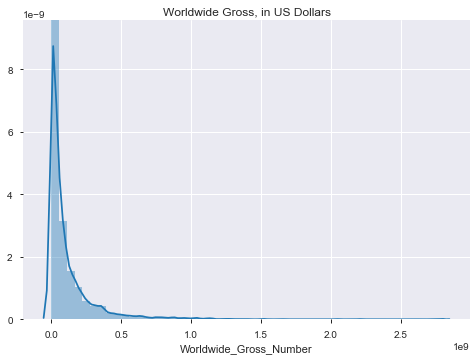

In [31]:
sns.distplot(box_office[target])
plt.title('Worldwide Gross, in US Dollars')

Text(0.5, 1.0, 'Worldwide Gross, in log-dollars')

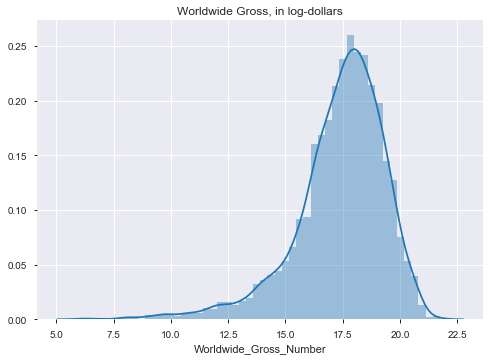

In [32]:
sns.distplot(y_log)
plt.title('Worldwide Gross, in log-dollars')

In [33]:
box_office['gross_log'] = y_log

In [34]:
box_office['release_year'] = box_office['Release_dt'].dt.year
box_office['release_month'] = box_office['Release_dt'].dt.month

In [35]:
# Train/Validate/Test split by year
train = box_office[box_office['Release_dt'].dt.year < 2009]
val = box_office[(box_office['Release_dt'].dt.year < 2014) & (box_office['Release_dt'].dt.year >= 2009)]
test = box_office[box_office['Release_dt'].dt.year >= 2014]

In [36]:
target = 'gross_log'

In [37]:
train.shape

(2354, 31)

In [38]:
val.shape

(792, 31)

In [39]:
test.shape

(766, 31)

In [40]:
2354 + 792 + 766
# My train/validate/test split appears to have worked!

3912

In [41]:
# Make averageRating categorical

In [42]:
# Mean worldwide gross in log-dollars
train[target].mean()

17.25923402478346

In [43]:
import math
from sklearn.metrics import mean_squared_error

# Baseline? What's my mean?
y_mean = train[target].mean()

# What's my mean squared error if I always guess the mean?
y_pred = pd.Series(y_mean for _ in range(len(val[target])))
mse = mean_squared_error(val[target], y_pred)

In [44]:
# Mean squared error for mean baseline = 4.55 log-dollars
mse

4.555124292593721

In [45]:
# Does this give me the MSE in dollars? Seems impossibly close...
np.expm1(mse)

94.11857703553248

In [48]:
X_train = train.drop(columns=[target, 'Worldwide_Gross_Number', 'Release_dt', 'primaryTitle'])
y_train = train[target]
X_val = val.drop(columns=[target, 'Worldwide_Gross_Number', 'Release_dt', 'primaryTitle'])
y_val = val[target]
X_test = test.drop(columns=[target, 'Worldwide_Gross_Number', 'Release_dt', 'primaryTitle'])
y_test = test[target]

In [49]:
X_train.head()

,averageRating,runtimeNumber,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,News,Romance,Sci-Fi,Sport,Thriller,War,Western,Production_Budget_Number,release_year,release_month
12397,7.7,88.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,3500000,1980,7
12427,5.8,104.0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,4500000,1980,6
12428,7.9,133.0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,27000000,1980,6
12440,7.3,98.0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,6000000,1980,7
12444,4.1,124.0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,20000000,1980,6


In [50]:
y_train.head()

12397    18.239801
12427    17.685123
12428    17.862587
12440    17.500541
12444    14.508658
Name: gross_log, dtype: float64

# Fitting xgboost Model

In [51]:
from xgboost import XGBRegressor

In [82]:
model = XGBRegressor(n_estimators=100, n_jobs=-1)
model.fit(X_train, y_train)

c:\users\ben\anaconda3\envs\unit2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\ben\anaconda3\envs\unit2\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[15:40:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [83]:
y_pred = model.predict(X_val)

In [84]:
y_pred

array([18.855772 , 17.236538 , 19.099909 , 19.181389 , 16.888264 ,
       17.654638 , 18.348654 , 17.568031 , 18.723486 , 17.918226 ,
       18.703749 , 20.242363 , 19.58417  , 19.485094 , 20.40959  ,
       18.587494 , 19.582497 , 17.345297 , 18.866325 , 18.99305  ,
       20.45397  , 19.371696 , 19.948149 , 18.269978 , 19.405952 ,
       18.098692 , 19.16975  , 17.559944 , 17.930069 , 17.844542 ,
       19.39551  , 17.689877 , 18.954664 , 19.953949 , 19.974693 ,
       17.476555 , 17.779871 , 16.223938 , 18.92922  , 18.158033 ,
       19.052073 , 16.564947 , 18.571293 , 17.047836 , 18.610182 ,
       19.086021 , 17.814013 , 17.770967 , 17.588985 , 18.629917 ,
       19.56387  , 17.611357 , 17.606354 , 17.389536 , 16.979492 ,
       20.17907  , 17.424574 , 18.3099   , 17.60978  , 17.476173 ,
       17.947586 , 17.03928  , 20.218927 , 18.095654 , 17.40466  ,
       17.149233 , 19.513737 , 18.369555 , 18.888477 , 17.986551 ,
       17.93408  , 16.738174 , 14.252883 , 18.734491 , 19.2184

In [85]:
mse = mean_squared_error(y_val, y_pred)
mse

1.7927310383055173

In [86]:
mean_squared_error(y_train, model.predict(X_train))

1.226353408765509

In [87]:
# MSE for XGBRegressor = 1.79 log-dollars
np.expm1(mse)

5.005832247221522

# Get Permutation Importances for XGBoost model

In [62]:
import eli5
from eli5.sklearn import PermutationImportance
# Model already fit with train data
permuter = PermutationImportance(
    model,
    scoring='neg_mean_squared_error',
    n_iter=5
)
permuter.fit(X_val, y_val)

PermutationImportance(cv='prefit',
                      estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1, gamma=0,
                                             importance_type='gain',
                                             learning_rate=0.1,
                                             max_delta_step=0, max_depth=3,
                                             min_child_weight=1, missing=None,
                                             n_estimators=100, n_jobs=-1,
                                             nthread=None,
                                             objective='reg:linear',
                                             random_state=0, reg_alpha=0,
                                             reg_lambda=1, scale_pos_weight=1,
                                      

In [63]:
permuter.feature_importances_

array([ 4.63787171e-01, -6.12995440e-02,  0.00000000e+00,  0.00000000e+00,
       -1.76271017e-04,  6.13678569e-02,  1.14873610e-02,  9.97868735e-03,
       -1.79583045e-04,  7.39170331e-02,  1.56307841e-03,  5.36864187e-04,
        1.08871621e-02,  4.35531603e-02,  1.43862503e-03,  8.98251603e-04,
        2.54902881e-02, -2.02185383e-03, -2.69360976e-03,  1.84270623e-03,
        1.56052619e-04, -8.51598539e-04,  5.04592938e-02,  1.45898559e-03,
        4.16436608e+00,  0.00000000e+00,  8.12829735e-02])

In [64]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_val.columns.tolist())

Weight,Feature
4.1644 ± 0.3209,Production_Budget_Number
0.4638 ± 0.1246,averageRating
0.0813 ± 0.0334,release_month
0.0739 ± 0.0153,Drama
0.0614 ± 0.0390,Biography
0.0505 ± 0.0277,War
0.0436 ± 0.0269,Horror
0.0255 ± 0.0056,Mystery
0.0115 ± 0.0090,Comedy
0.0109 ± 0.0158,History


# Fitting Linear Regression model?

In [73]:
from sklearn.linear_model import LinearRegression

In [88]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
y_pred = model.predict(X_val)
y_pred

array([18.4598842 , 16.67319162, 18.81210519, 18.18016997, 16.25202038,
       16.99891699, 18.43019111, 16.99548047, 18.83120079, 16.90915731,
       18.95165397, 24.39895085, 24.11488078, 21.1686114 , 24.72860341,
       17.97863038, 19.89390775, 17.03006622, 18.25479677, 19.71905475,
       23.23083119, 20.02813532, 21.67348679, 17.7216959 , 19.54293295,
       17.70146606, 20.06882251, 17.21052397, 17.3514146 , 17.36750306,
       19.83035223, 17.38228307, 18.88467645, 20.3202697 , 20.40859392,
       16.71697703, 17.36362926, 16.16016279, 18.53314925, 17.50944858,
       19.29903452, 16.48478992, 17.78767068, 17.25967765, 18.15122394,
       18.98850587, 17.14540906, 17.14147056, 16.88804422, 18.29785068,
       20.78534014, 17.24798767, 17.00329378, 16.50570515, 16.84974013,
       23.96914842, 17.23030274, 17.98311353, 16.70435008, 16.92842626,
       17.62486077, 16.86781864, 22.94139694, 17.54528244, 16.38910637,
       16.27922995, 19.80830633, 17.61449549, 20.14900085, 17.46

In [90]:
mean_squared_error(y_val, y_pred)
mse

1.7927310383055173

Seems to give me very similar output. Interesting...
I must wonder if there's something wrong with my MSE display. Getting exactly the same MSE for XGBoost and linear regression seems odd. But the y_pred arrays are very similar though slightly different...